In [46]:
#Research Question 1
# Is there a statistically significant difference in average salaries between male and female employees for the same job position?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind, shapiro, levene


In [4]:
df = pd.read_csv("C:\\Users\\ADMIN\\OneDrive\\Desktop\\data visualization\\PROJECT\\Glassdoor-Gender-Pay-Gap.csv")
df


,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [5]:
# Check for missing values and drop rows with missing values (if any)
df = df.dropna()



In [18]:
# Remove duplicate rows
df = df.drop_duplicates()



In [9]:
# Ensure data types are correct (convert columns if necessary)
# For example, if 'Age' should be an integer, ensure it's correctly typed
# Ensure data types are correct (convert columns if necessary)
df['age'] = df['age'].astype(int)



In [25]:
# Handle outliers (example: remove rows with BasePay or Bonus beyond a reasonable range)
df = df[(df['basepay'] > 0) & (df['bonus'] > 0)]

df["gender"] = df["gender"].astype("category")
df["education"] = df["education"].astype("category")
df["dept"] = df["dept"].astype("category")
df["totalcomp"] = df["basepay"] + df["bonus"]

In [10]:
# Standardize column names (optional, e.g., make all lowercase)
df.columns = df.columns.str.lower()

# Display the cleaned dataset
df

,jobtitle,gender,age,perfeval,education,dept,seniority,basepay,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [16]:
# Filter job titles with both male and female employees
role_gender_counts = df.groupby(["jobtitle", "gender"]).size().unstack()
valid_roles = role_gender_counts.dropna().index.tolist()
filtered_df = df[df["jobtitle"].isin(valid_roles)]  # ✅ Define filtered_df properly here

In [17]:
#  Analysis Loop
results = []

for role in valid_roles:
    sub_df = df[df["jobtitle"] == role]
    males = sub_df[sub_df["gender"] == "Male"]["basepay"]
    females = sub_df[sub_df["gender"] == "Female"]["basepay"]
    
    if len(males) > 1 and len(females) > 1:
        # Normality Test (Shapiro-Wilk)
        male_normal = shapiro(males)[1] > 0.05
        female_normal = shapiro(females)[1] > 0.05
        
        # Variance Equality (Levene’s Test)
        equal_var = levene(males, females)[1] > 0.05
        
        # Use Welch's t-test (default safe option)
        t_stat, p_val = ttest_ind(males, females, equal_var=False)
        pooled_std = np.sqrt((males.std()**2 + females.std()**2) / 2)
        cohen_d = (males.mean() - females.mean()) / pooled_std

        results.append({
            "JobTitle": role,
            "Male_Mean": round(males.mean(), 2),
            "Female_Mean": round(females.mean(), 2),
            "P-Value": round(p_val, 4),
            "Cohen_d": round(cohen_d, 3),
            "Male_Normal": male_normal,
            "Female_Normal": female_normal,
            "Equal_Variance": equal_var,
            "Test_Type": "Welch t-test"
        })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values("P-Value")
print("Gender Pay Analysis by Job Title:\n")
print(results_df)


Gender Pay Analysis by Job Title:

              JobTitle  Male_Mean  Female_Mean  P-Value  Cohen_d  Male_Normal  \
8    Software Engineer  106371.49     94701.00   0.1156    0.540         True   
0       Data Scientist   89222.63     95704.79   0.1405   -0.287         True   
9  Warehouse Associate   86553.43     92428.26   0.1856   -0.282         True   
1               Driver   91952.67     86867.63   0.2636    0.236         True   
6  Marketing Associate   81881.82     76119.18   0.4102    0.269         True   
7      Sales Associate   94663.12     91894.21   0.5539    0.122         True   
3     Graphic Designer   89595.80     92243.29   0.5703   -0.115         True   
5              Manager  124848.93    127252.28   0.6554   -0.116         True   
2    Financial Analyst   94607.03     95458.33   0.8401   -0.040         True   
4                   IT   91021.98     90475.72   0.9134    0.022         True   

   Female_Normal  Equal_Variance     Test_Type  
8           True        

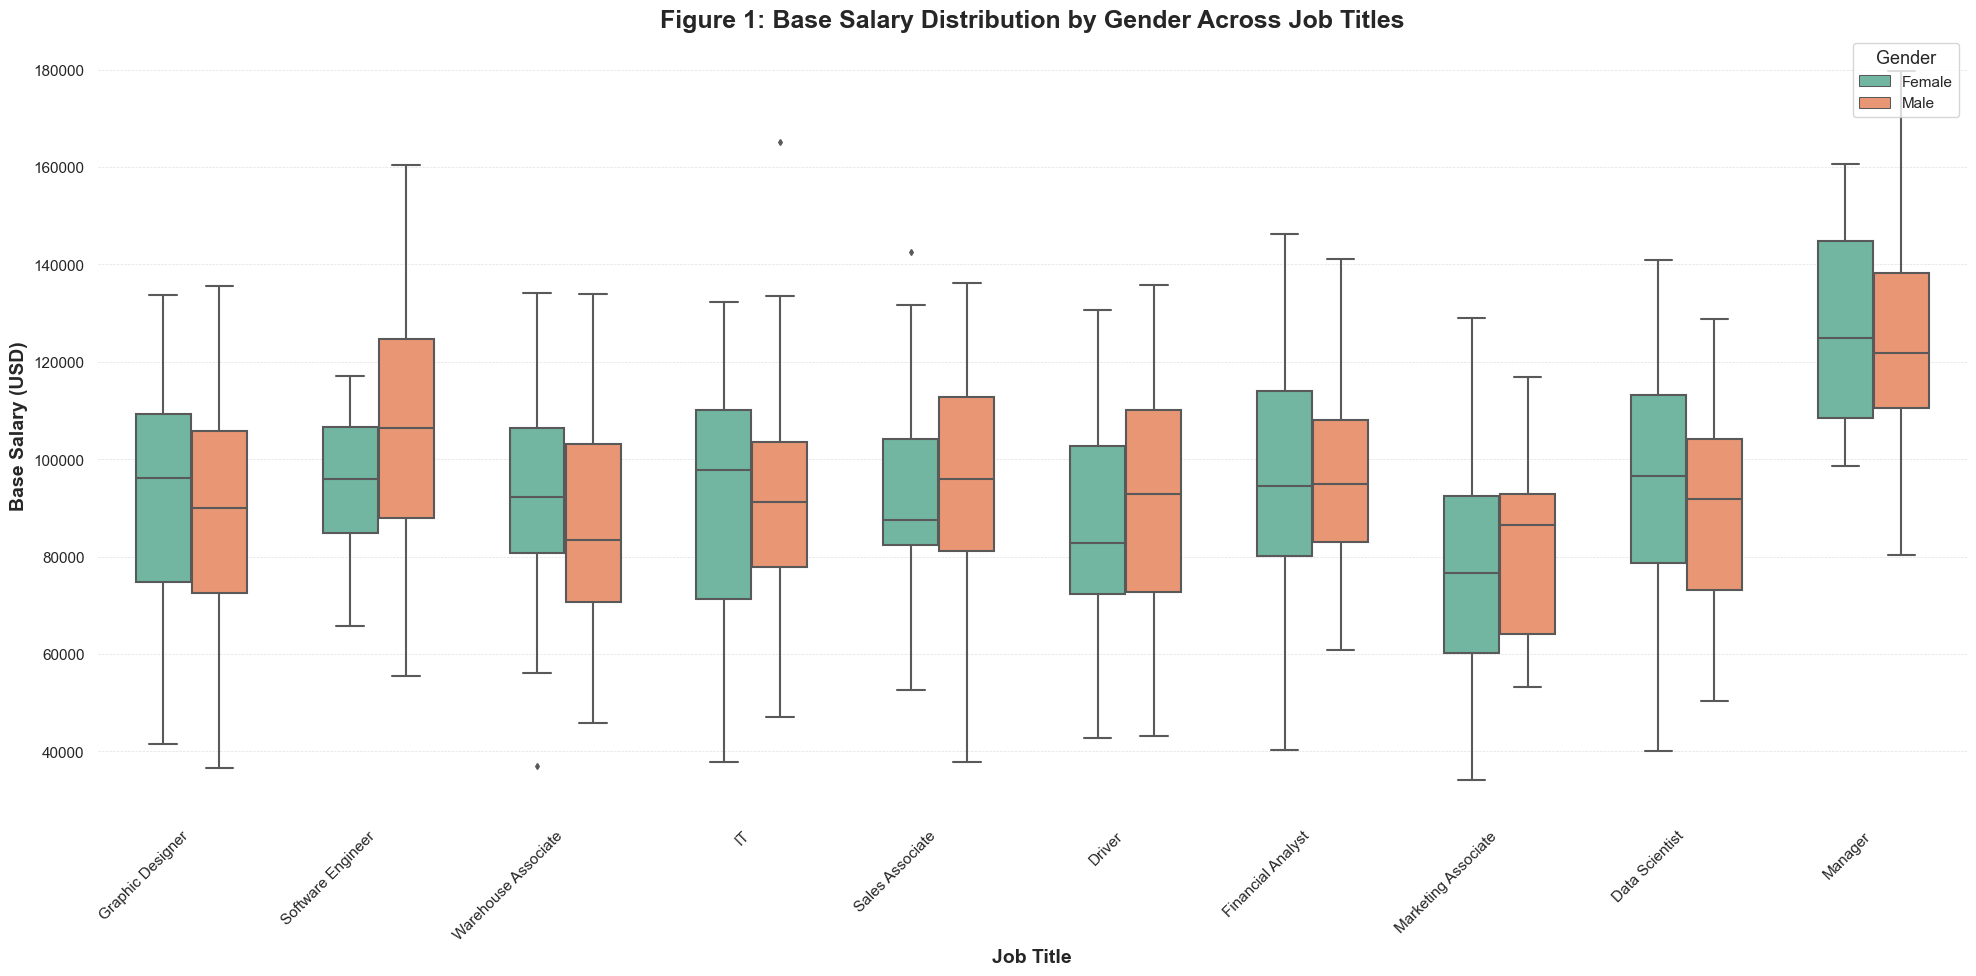

In [18]:
# Libraries already imported previously
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

plt.figure(figsize=(20, 10))
box = sns.boxplot(
    data=filtered_df,
    x="jobtitle",
    y="basepay",
    hue="gender",
    width=0.6,
    fliersize=3,
    linewidth=1.5
)

# ✍️ Formatting
plt.title("Figure 1: Base Salary Distribution by Gender Across Job Titles", fontsize=18, fontweight='bold')
plt.xlabel("Job Title", fontsize=14, fontweight='bold')
plt.ylabel("Base Salary (USD)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Gender", title_fontsize=13, fontsize=11, loc='upper right')
plt.tight_layout()
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
plt.box(False)

# 📊 Show the plot
plt.show()
